# Linear Regression

## Introduction
Linear regression is a foundational algorithm in machine learning and statistics used to predict continuous outcomes by modeling relationships between independent variables (features) and a dependent variable (target). It assumes a linear relationship between the features and the target, making it useful for simple predictive modeling. In this notebook, we will apply linear regression to predict outcomes and evaluate the model's performance using various metrics.

## 1. Data

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/Users/stitchbleu/577_Project/Data/day.csv')
data.info()
data.head()

data = data.drop(['instant', 'dteday'], axis=1)

X = data.drop('cnt', axis=1) 
y = data['cnt']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData has been split into training and testing sets.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Data has been split into training and testing sets.


## 2. Train and define model

In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

train_r2 = linear_model.score(X_train, y_train)
print(f"Training R^2 Score: {train_r2:.4f}")


Training R^2 Score: 1.0000


## 3. Evaluation

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R^2 Score: 1.0000


## 4. Visualization

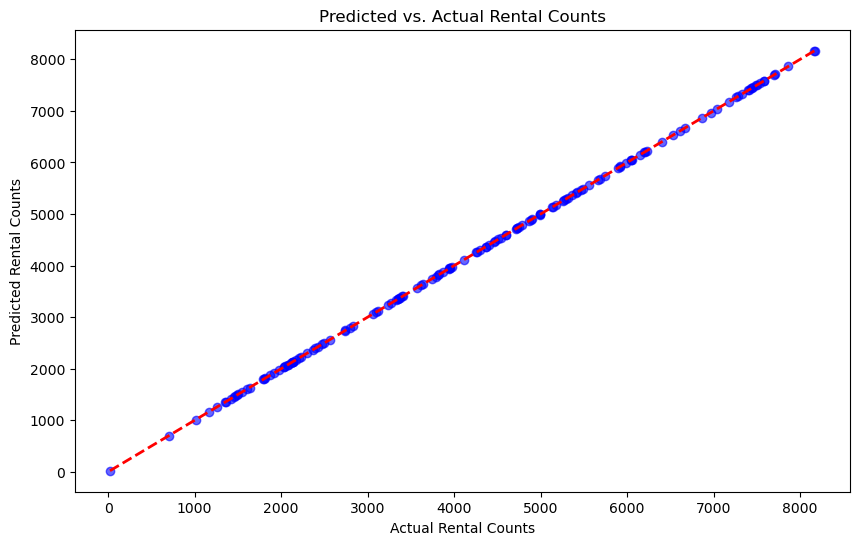

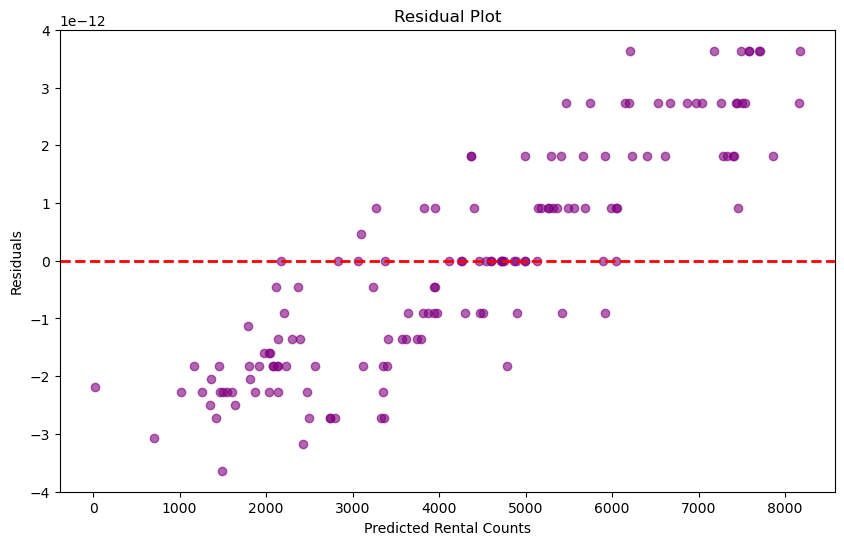

In [24]:
import matplotlib.pyplot as plt

# Predicted vs. Actual values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_unscaled, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Rental Counts")
plt.ylabel("Predicted Rental Counts")
plt.title("Predicted vs. Actual Rental Counts")
plt.show()

# Residual plot
residuals = y_test - y_pred_unscaled
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_unscaled, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Rental Counts")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
